<a href="https://colab.research.google.com/github/ADMITO-MITO/Treino-google-colab/blob/main/Treino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sat Sep 13 03:33:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

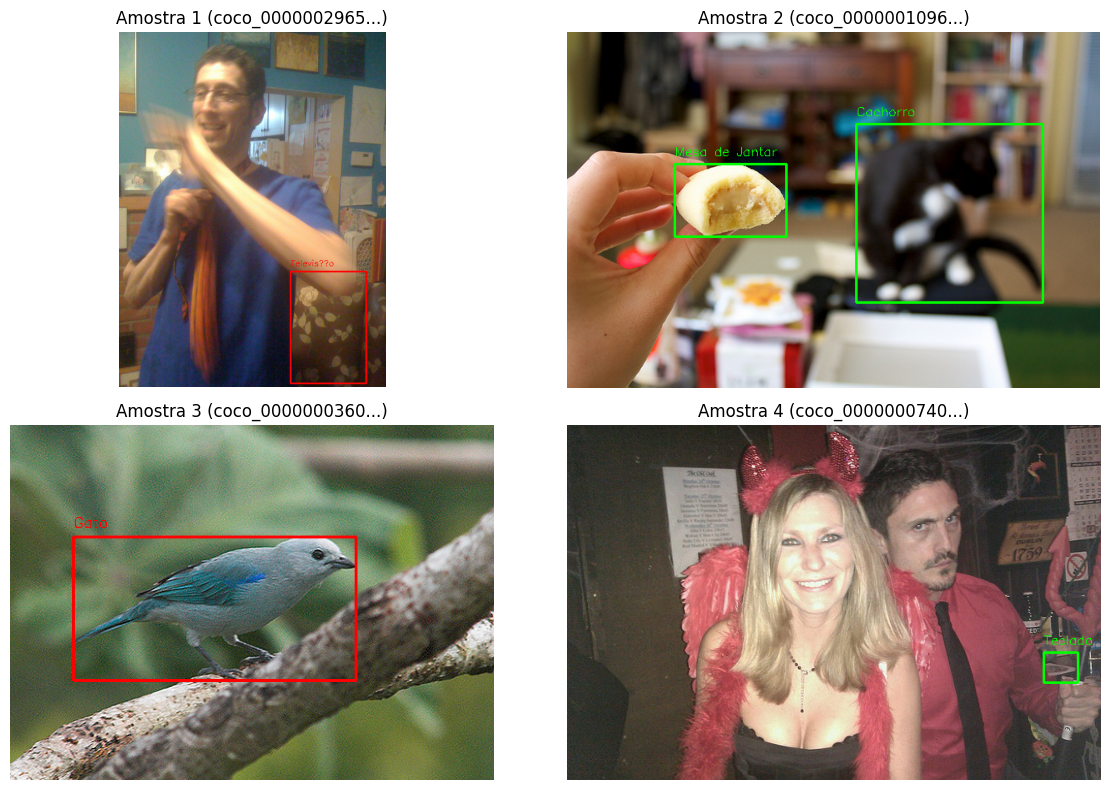

⚙️ DATASET PRONTO PARA TREINAMENTO!
📋 Arquivo de config: /content/dataset_final_expandido/dataset.yaml
🎯 Total de imagens: 17234

⚙️ CONFIGURAÇÕES DE TREINAMENTO:
   Épocas: 100
   Modelo: YOLOv8s
   Batch size: 16
   Classes: 35

⏱️ TEMPO ESTIMADO:
   Aproximadamente: 107.7 horas

✅ STATUS: PRONTO PARA TREINAR!
Execute a próxima célula para iniciar o treinamento
🚀 INICIANDO TREINAMENTO...
✅ Modelo YOLOv8s carregado
Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_final_expandido/dataset.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=tor

In [ ]:
# =============================================================================
# NOTEBOOK GOOGLE COLAB - TREINAMENTO YOLO COM DATASET HÍBRIDO (ZIP) - VERSÃO CORRIGIDA
# =============================================================================
#
# INSTRUÇÕES:
# 1. Faça upload do arquivo "dataset_hibrido_*.zip" para seu Google Drive
# 2. Execute as células na ordem
# 3. Aguarde o treinamento (2-4 horas)
# 4. Baixe o modelo treinado (será salvo automaticamente no Drive)

# =============================================================================
# CÉLULA 1: INSTALAÇÃO E CONFIGURAÇÃO INICIAL
# =============================================================================

# Instalar dependências
!pip install ultralytics -q
!pip install roboflow -q

# Verificar GPU
!nvidia-smi

# Imports
import os
import zipfile
import yaml
import shutil
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import Image, display
import torch
from ultralytics import YOLO

print("🚀 Ambiente configurado!")
print(f"PyTorch: {torch.__version__}")
print(f"CUDA disponível: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")


# =============================================================================
# CÉLULA 2: CONECTAR GOOGLE DRIVE
# =============================================================================

from google.colab import drive
drive.mount('/content/drive')
print("✅ Google Drive conectado!")


# =============================================================================
# CÉLULA 3: EXTRAIR DATASET DO ZIP (VERSÃO CORRIGIDA)
# =============================================================================

# AJUSTE APENAS ESTA LINHA COM O NOME DO SEU ARQUIVO ZIP:
ZIP_NAME = "dataset_hibrido.zip"  # ← MUDE AQUI

# Resto do código (corrigido para lidar com estrutura aninhada):
zip_path = f"/content/drive/MyDrive/{ZIP_NAME}"

if not os.path.exists(zip_path):
    print("❌ Arquivo ZIP não encontrado!")
    print(f"Procurando: {zip_path}")
    print("\n📁 Arquivos disponíveis no Drive:")
    drive_files = []
    for file in os.listdir("/content/drive/MyDrive/"):
        if file.endswith('.zip'):
            drive_files.append(file)
            print(f"  📦 {file}")

    if drive_files:
        print(f"\n💡 DICA: Altere ZIP_NAME para um destes arquivos:")
        for f in drive_files:
            print(f'   ZIP_NAME = "{f}"')

else:
    # Extrair dataset
    temp_extract_dir = "/content/temp_extract/"
    final_dataset_dir = "/content/dataset_final_expandido/"

    # Limpar diretórios existentes
    if os.path.exists(temp_extract_dir):
        shutil.rmtree(temp_extract_dir)
    if os.path.exists(final_dataset_dir):
        shutil.rmtree(final_dataset_dir)

    print(f"📦 Extraindo {ZIP_NAME}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(temp_extract_dir)

    print("🔧 Corrigindo estrutura aninhada...")

    # Encontrar a pasta real do dataset (pode estar aninhada)
    def find_dataset_folder(root_dir):
        for root, dirs, files in os.walk(root_dir):
            # Procurar por pasta que contém 'images' e 'labels'
            if 'images' in dirs and 'labels' in dirs:
                return root
            # Ou procurar por arquivo .yaml
            for file in files:
                if file.endswith('.yaml') or file.endswith('.yml'):
                    return root
        return None

    actual_dataset_path = find_dataset_folder(temp_extract_dir)

    if actual_dataset_path:
        print(f"📂 Dataset encontrado em: {actual_dataset_path}")
        # Mover para local correto
        shutil.move(actual_dataset_path, final_dataset_dir)
        # Limpar pasta temporária
        shutil.rmtree(temp_extract_dir)
        print("✅ Dataset extraído e estrutura corrigida!")
    else:
        print("❌ Estrutura do dataset não reconhecida!")
        print("🔍 Conteúdo extraído:")
        !ls -la /content/temp_extract/

    # Verificar estrutura final
    print("\n📁 Estrutura final:")
    if os.path.exists(final_dataset_dir):
        !ls -la /content/dataset_final_expandido/


# =============================================================================
# CÉLULA 4: VERIFICAR ESTRUTURA DO DATASET (CORRIGIDA)
# =============================================================================

print("📁 Verificando estrutura do dataset...")

# Verificar se tem as pastas necessárias
required_folders = [
    "/content/dataset_final_expandido/images/train",
    "/content/dataset_final_expandido/images/val",
    "/content/dataset_final_expandido/labels/train",
    "/content/dataset_final_expandido/labels/val"
]

all_good = True
for folder in required_folders:
    if os.path.exists(folder):
        count = len(os.listdir(folder))
        print(f"✅ {folder}: {count} arquivos")
    else:
        print(f"❌ {folder}: NÃO ENCONTRADA")
        all_good = False

if not all_good:
    print("\n🔍 ESTRUTURA ATUAL:")
    !find /content/dataset_final_expandido -type d | head -15

    print("\n🔧 TENTANDO AUTO-CORREÇÃO...")

    # Procurar pastas em qualquer lugar dentro do diretório
    images_train = None
    images_val = None
    labels_train = None
    labels_val = None

    for root, dirs, files in os.walk("/content/dataset_final_expandido"):
        if root.endswith('/images/train') or root.endswith('/train') and 'images' in root:
            images_train = root
        elif root.endswith('/images/val') or root.endswith('/val') and 'images' in root:
            images_val = root
        elif root.endswith('/labels/train') or root.endswith('/train') and 'labels' in root:
            labels_train = root
        elif root.endswith('/labels/val') or root.endswith('/val') and 'labels' in root:
            labels_val = root

    # Se encontrou as pastas, reorganizar
    if all([images_train, images_val, labels_train, labels_val]):
        print("🔧 Reorganizando estrutura...")

        # Criar estrutura correta
        os.makedirs("/content/dataset_final_expandido/images/train", exist_ok=True)
        os.makedirs("/content/dataset_final_expandido/images/val", exist_ok=True)
        os.makedirs("/content/dataset_final_expandido/labels/train", exist_ok=True)
        os.makedirs("/content/dataset_final_expandido/labels/val", exist_ok=True)

        # Mover arquivos se necessário
        if images_train != "/content/dataset_final_expandido/images/train":
            for file in os.listdir(images_train):
                shutil.move(os.path.join(images_train, file),
                          "/content/dataset_final_expandido/images/train/")

        if images_val != "/content/dataset_final_expandido/images/val":
            for file in os.listdir(images_val):
                shutil.move(os.path.join(images_val, file),
                          "/content/dataset_final_expandido/images/val/")

        if labels_train != "/content/dataset_final_expandido/labels/train":
            for file in os.listdir(labels_train):
                shutil.move(os.path.join(labels_train, file),
                          "/content/dataset_final_expandido/labels/train/")

        if labels_val != "/content/dataset_final_expandido/labels/val":
            for file in os.listdir(labels_val):
                shutil.move(os.path.join(labels_val, file),
                          "/content/dataset_final_expandido/labels/val/")

        print("✅ Estrutura reorganizada com sucesso!")
        all_good = True
    else:
        print("❌ Não foi possível corrigir automaticamente")


# =============================================================================
# CÉLULA 5: CARREGAR CONFIGURAÇÃO
# =============================================================================

# Procurar arquivo de configuração
config_files = []
for root, dirs, files in os.walk("/content/dataset_final_expandido/"):
    for file in files:
        if file.endswith('.yaml') or file.endswith('.yml'):
            config_files.append(os.path.join(root, file))

config_path = None
config = None

if config_files:
    config_path = config_files[0]
    print(f"📋 Arquivo de configuração encontrado: {config_path}")

    # Carregar configuração
    with open(config_path, 'r', encoding='utf-8') as f:
        config = yaml.safe_load(f)

    print(f"Classes: {config['nc']}")
    print("Nomes das classes:")
    for i, name in enumerate(config['names']):
        print(f"  {i:2d}. {name}")

    # Atualizar caminho no config
    config['path'] = '/content/dataset_final_expandido'
    with open(config_path, 'w', encoding='utf-8') as f:
        yaml.dump(config, f, allow_unicode=True)

else:
    print("❌ Arquivo .yaml não encontrado!")
    print("Arquivos disponíveis:")
    !find /content/ -name "*.yaml" -o -name "*.yml"


# =============================================================================
# CÉLULA 6: CONTAR IMAGENS E ESTATÍSTICAS
# =============================================================================

train_imgs = 0
val_imgs = 0
coco_imgs = 0
roboflow_imgs = 0

if os.path.exists("/content/dataset_final_expandido/images/train"):
    train_imgs = len([f for f in os.listdir("/content/dataset_final_expandido/images/train")
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    print(f"📊 Imagens de treino: {train_imgs}")

    # Contar origem das imagens (COCO vs Roboflow)
    coco_imgs = len([f for f in os.listdir("/content/dataset_final_expandido/images/train")
                     if f.startswith('coco_')])
    roboflow_imgs = len([f for f in os.listdir("/content/dataset_final_expandido/images/train")
                         if f.startswith('roboflow_')])

if os.path.exists("/content/dataset_final_expandido/images/val"):
    val_imgs = len([f for f in os.listdir("/content/dataset_final_expandido/images/val")
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    print(f"📊 Imagens de validação: {val_imgs}")

total_imgs = train_imgs + val_imgs
print(f"🎯 Total de imagens: {total_imgs}")
print(f"📈 Imagens do COCO: {coco_imgs}")
print(f"📈 Imagens do Roboflow: {roboflow_imgs}")

if total_imgs < 100:
    print("⚠️ ATENÇÃO: Poucas imagens encontradas!")
    print("Verifique se o ZIP está correto")


# =============================================================================
# CÉLULA 7: VISUALIZAR AMOSTRAS
# =============================================================================

if all_good and total_imgs > 0:
    import random
    import cv2
    from PIL import Image as PILImage
    import numpy as np

    print("🖼️ AMOSTRAS DO DATASET:")

    def show_sample_images(dataset_path, num_samples=4):
        img_dir = Path(dataset_path) / "images" / "train"
        lbl_dir = Path(dataset_path) / "labels" / "train"

        img_files = [f for f in img_dir.glob("*") if f.suffix.lower() in ['.jpg', '.jpeg', '.png']]

        if len(img_files) == 0:
            print("❌ Nenhuma imagem encontrada!")
            return

        samples = random.sample(img_files, min(num_samples, len(img_files)))

        plt.figure(figsize=(12, 8))

        for i, img_file in enumerate(samples):
            # Carregar imagem
            img = cv2.imread(str(img_file))
            if img is None:
                print(f"⚠️ Erro ao carregar {img_file}")
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            h, w = img.shape[:2]

            # Carregar anotações
            lbl_file = lbl_dir / f"{img_file.stem}.txt"
            if lbl_file.exists():
                with open(lbl_file, 'r') as f:
                    for line in f:
                        if line.strip():
                            parts = line.strip().split()
                            if len(parts) >= 5:
                                class_id = int(parts[0])
                                x_center, y_center, width, height = map(float, parts[1:5])

                                # Converter para coordenadas da imagem
                                x1 = int((x_center - width/2) * w)
                                y1 = int((y_center - height/2) * h)
                                x2 = int((x_center + width/2) * w)
                                y2 = int((y_center + height/2) * h)

                                # Desenhar bbox
                                color = (255, 0, 0) if i % 2 == 0 else (0, 255, 0)
                                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

                                # Adicionar label se temos config
                                if config and class_id < len(config['names']):
                                    class_name = config['names'][class_id]
                                    cv2.putText(img, class_name, (x1, y1-10),
                                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

            plt.subplot(2, 2, i+1)
            plt.imshow(img)
            plt.title(f"Amostra {i+1} ({img_file.name[:15]}...)")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

    show_sample_images("/content/dataset_final_expandido/")
else:
    print("⚠️ Pulando visualização - corrija os problemas acima primeiro")


# =============================================================================
# CÉLULA 8: CONFIGURAÇÃO DE TREINAMENTO (CORRIGIDA)
# =============================================================================

# INICIALIZAR VARIÁVEIS SEMPRE (correção principal)
EPOCHS = 100
MODEL_SIZE = "s"  # s, m, l, x
BATCH_SIZE = 16   # Ajustar conforme GPU

if config_path and all_good and total_imgs > 0:
    print("⚙️ DATASET PRONTO PARA TREINAMENTO!")
    print(f"📋 Arquivo de config: {config_path}")
    print(f"🎯 Total de imagens: {total_imgs}")

    print(f"\n⚙️ CONFIGURAÇÕES DE TREINAMENTO:")
    print(f"   Épocas: {EPOCHS}")
    print(f"   Modelo: YOLOv8{MODEL_SIZE}")
    print(f"   Batch size: {BATCH_SIZE}")
    if config:
        print(f"   Classes: {config['nc']}")

    # Mostrar estimativa de tempo
    print(f"\n⏱️ TEMPO ESTIMADO:")
    time_estimate = (total_imgs * EPOCHS) / (BATCH_SIZE * 1000)  # Estimativa rough
    print(f"   Aproximadamente: {time_estimate:.1f} horas")

    training_ready = True

else:
    print("❌ DATASET COM PROBLEMAS - corrija antes de prosseguir")
    training_ready = False

print(f"\n✅ STATUS: {'PRONTO PARA TREINAR!' if training_ready else 'AGUARDANDO CORREÇÕES'}")
print("Execute a próxima célula para iniciar o treinamento")


# =============================================================================
# CÉLULA 9: TREINAMENTO (CORRIGIDA)
# =============================================================================

# Verificar se está pronto para treinamento
if 'training_ready' not in locals() or not training_ready:
    print("❌ Execute as células anteriores primeiro para preparar o dataset!")
else:
    print("🚀 INICIANDO TREINAMENTO...")
    print("="*50)

    # Carregar modelo pré-treinado
    model = YOLO(f'yolov8{MODEL_SIZE}.pt')
    print(f"✅ Modelo YOLOv8{MODEL_SIZE} carregado")

    # Treinamento otimizado para dataset híbrido
    try:
        results = model.train(
            data=config_path,
            epochs=EPOCHS,
            imgsz=640,
            batch=BATCH_SIZE,
            device=0,  # GPU

            # Otimizações para Colab
            cache=True,
            workers=2,

            # Configurações de aprendizado (otimizadas para objetos do dia-a-dia)
            optimizer='AdamW',
            lr0=0.01,      # Learning rate inicial
            lrf=0.01,      # Learning rate final
            momentum=0.937,
            weight_decay=0.0005,
            warmup_epochs=3,

            # Early stopping
            patience=30,

            # Data augmentation (balanceado para objetos diversos)
            augment=True,
            hsv_h=0.015,    # Matiz
            hsv_s=0.7,      # Saturação
            hsv_v=0.4,      # Valor
            degrees=10.0,   # Rotação
            translate=0.1,  # Translação
            scale=0.5,      # Escala
            flipud=0.0,     # Flip vertical (desabilitado - objetos têm orientação)
            fliplr=0.5,     # Flip horizontal
            mosaic=1.0,     # Mosaic augmentation
            mixup=0.1,      # MixUp

            # Configurações de salvamento
            save=True,
            save_period=0,  # Salvar a cada N épocas (0 = só melhor e último)

            # Nome do experimento
            name="hybrid_dataset_training",

            # Logs e plots
            verbose=True,
            plots=True
        )

        print("✅ TREINAMENTO CONCLUÍDO!")
        training_completed = True

    except Exception as e:
        print(f"❌ ERRO NO TREINAMENTO: {e}")
        training_completed = False


# =============================================================================
# CÉLULA 10: AVALIAÇÃO DOS RESULTADOS
# =============================================================================

if 'training_completed' in locals() and training_completed and 'results' in locals():
    print("📊 AVALIANDO MODELO...")

    # Carregar melhor modelo
    best_model_path = results.save_dir / "weights" / "best.pt"
    best_model = YOLO(str(best_model_path))

    # Validação
    val_results = best_model.val(data=config_path)

    print("📈 RESULTADOS FINAIS:")
    print(f"mAP50: {val_results.box.map50:.4f}")
    print(f"mAP50-95: {val_results.box.map:.4f}")
    print(f"Precisão: {val_results.box.mp:.4f}")
    print(f"Recall: {val_results.box.mr:.4f}")

    # Mostrar métricas por classe
    if hasattr(val_results.box, 'ap_class_index') and config:
        print("\n📋 DESEMPENHO POR CLASSE:")
        for i, class_idx in enumerate(val_results.box.ap_class_index):
            if i < len(val_results.box.ap50):
                class_name = config['names'][class_idx]
                ap50 = val_results.box.ap50[i]
                print(f"  {class_name:<20}: mAP50 = {ap50:.3f}")

    evaluation_completed = True
else:
    print("❌ Execute o treinamento primeiro!")
    evaluation_completed = False


# =============================================================================
# CÉLULA 11: TESTAR O MODELO
# =============================================================================

if 'evaluation_completed' in locals() and evaluation_completed:
    print("🧪 TESTANDO O MODELO...")

    # Testar em algumas imagens de validação
    val_img_dir = Path("/content/dataset_final_expandido/images/val")
    test_images = list(val_img_dir.glob("*.jpg"))[:5]

    if len(test_images) > 0:
        plt.figure(figsize=(20, 4))
        for i, img_path in enumerate(test_images):
            # Fazer predição
            results_pred = best_model(str(img_path))

            # Plotar resultado
            plt.subplot(1, 5, i+1)

            # Carregar imagem original
            img = cv2.imread(str(img_path))
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Desenhar predições
                if len(results_pred[0].boxes) > 0:
                    for box in results_pred[0].boxes:
                        # Coordenadas
                        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
                        conf = box.conf[0].cpu().numpy()
                        cls = int(box.cls[0].cpu().numpy())

                        if conf > 0.5:  # Filtrar baixa confiança
                            # Desenhar bbox
                            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

                            # Label
                            if config and cls < len(config['names']):
                                label = f"{config['names'][cls]}: {conf:.2f}"
                                cv2.putText(img, label, (x1, y1-10),
                                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

                plt.imshow(img)
            else:
                plt.text(0.5, 0.5, f"Erro ao carregar\n{img_path.name}",
                        ha='center', va='center', transform=plt.gca().transAxes)

            plt.title(f"Teste {i+1}")
            plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("❌ Nenhuma imagem de teste encontrada")
else:
    print("❌ Execute a avaliação primeiro!")


# =============================================================================
# CÉLULA 12: SALVAR MODELO NO DRIVE
# =============================================================================

if 'training_completed' in locals() and training_completed and 'results' in locals():
    print("💾 SALVANDO MODELO NO GOOGLE DRIVE...")

    # Criar pasta de resultados no Drive
    drive_results_dir = "/content/drive/MyDrive/YOLO_Hybrid_Results"
    os.makedirs(drive_results_dir, exist_ok=True)

    # Salvar modelo principal
    best_model_path = results.save_dir / "weights" / "best.pt"
    model_dest = f"{drive_results_dir}/modelo_hibrido_treinado.pt"

    if best_model_path.exists():
        shutil.copy2(best_model_path, model_dest)
        size_mb = os.path.getsize(model_dest) / (1024 * 1024)
        print(f"✅ Modelo salvo: modelo_hibrido_treinado.pt ({size_mb:.1f} MB)")

    # Salvar configuração
    if config_path:
        config_dest = f"{drive_results_dir}/dataset_config.yaml"
        shutil.copy2(config_path, config_dest)
        print(f"✅ Configuração salva: dataset_config.yaml")

    # Salvar gráficos principais
    results_dir = results.save_dir
    for plot_file in ["results.png", "confusion_matrix.png"]:
        plot_path = results_dir / plot_file
        if plot_path.exists():
            plot_dest = f"{drive_results_dir}/{plot_file}"
            shutil.copy2(plot_path, plot_dest)
            print(f"✅ Gráfico salvo: {plot_file}")

    print(f"\n📁 Todos os arquivos salvos em: {drive_results_dir}")
else:
    print("❌ Execute o treinamento primeiro!")


# =============================================================================
# CÉLULA 13: RELATÓRIO FINAL E CÓDIGO DE USO
# =============================================================================

if 'training_completed' in locals() and training_completed and 'val_results' in locals():
    print("\n" + "="*60)
    print("🎉 TREINAMENTO CONCLUÍDO COM SUCESSO!")
    print("="*60)

    print(f"📊 RESUMO DOS RESULTADOS:")
    print(f"  • Dataset: {total_imgs} imagens ({coco_imgs} COCO + {roboflow_imgs} Roboflow)")
    if config:
        print(f"  • Classes: {config['nc']}")
    print(f"  • mAP50: {val_results.box.map50:.3f}")
    print(f"  • mAP50-95: {val_results.box.map:.3f}")
    print(f"  • Precisão: {val_results.box.mp:.3f}")
    print(f"  • Recall: {val_results.box.mr:.3f}")

    print(f"\n📁 ARQUIVOS NO GOOGLE DRIVE:")
    print(f"  • Modelo: modelo_hibrido_treinado.pt")
    print(f"  • Configuração: dataset_config.yaml")
    print(f"  • Gráficos: results.png, confusion_matrix.png")

    print(f"\n🚀 CÓDIGO PARA USO LOCAL:")
    print("```python")
    print("from ultralytics import YOLO")
    print("import cv2")
    print("")
    print("# Carregar modelo treinado")
    print("modelo = YOLO('modelo_hibrido_treinado.pt')")
    print("")
    print("# Classes do modelo híbrido")
    if config:
        print(f"classes = {config['names']}")
    print("")
    print("# Usar na webcam")
    print("cap = cv2.VideoCapture(0)")
    print("while True:")
    print("    ret, frame = cap.read()")
    print("    if ret:")
    print("        results = modelo(frame)")
    print("        annotated_frame = results[0].plot()")
    print("        cv2.imshow('Detector Híbrido', annotated_frame)")
    print("        if cv2.waitKey(1) & 0xFF == ord('q'):")
    print("            break")
    print("cap.release()")
    print("cv2.destroyAllWindows()")
    print("```")

    print(f"\n✅ PRONTO! Seu modelo híbrido está treinado e salvo!")
    print("🎯 Agora você tem um detector com objetos do COCO + seus objetos personalizados!")
else:
    print("❌ Execute todas as células anteriores para completar o processo!")